# Importing of Packages and Defining Functions

## Import packages:

In [1]:
# Normal packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

# Statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import scipy.stats as stats


# Counter
from collections import Counter

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import sklearn.metrics as metrics


import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Define Functions (from proj 1)

### def check_column

In [0]:
# Check columns returns the datatype, null values and unique values of input series 
def check_column(series,nlargest='all'):
    print(f"Column: df['{series.name}']':")
    print(f"dtype: {series.dtype}")
    print(f"isna: {series.isna().sum()} out of {len(series)} - {round(series.isna().sum()/len(series)*100,3)}%")
        
    print(f'\nUnique non-na values:') #,df['waterfront'].unique())
    if nlargest =='all':
        print(series.value_counts())
    else:
        print(series.value_counts().nlargest(nlargest))

### def multiplot

In [0]:
# MULTIPLOT
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def multiplot(df):
    """Plots results from df.corr() in a correlation heat map for multicollinearity.
    Returns fig, ax objects"""
    sns.set(style="white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(16, 16))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, center=0,
                
    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return f, ax

### def detect_outliers

In [0]:
# Tukey's method using IQR to eliminate 
def detect_outliers(df, n, features):
    """Uses Tukey's method to return outer of interquartile ranges to return indices if outliers in a dataframe.
    Parameters:
    df (DataFrame): DataFrane containing columns of features
    n: default is 0, multiple outlier cutoff  
    
    Returns:
    Index of outliers for .loc
    
    Examples:
    Outliers_to_drop = detect_outliers(data,2,["col1","col2"]) Returning value
    df.loc[Outliers_to_drop] # Show the outliers rows
    data= data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
   """

# Drop outliers    

    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
        # select observations containing more than 2 outliers
        outlier_indices = Counter(outlier_indices)        
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers 


###def plot_wide_kde_thin_bar

In [0]:
def plot_wide_kde_thin_bar(series1,sname1, series2, sname2):
    '''Plot series1 and series 2 on wide kde plot with small mean+sem bar plot.'''
    
    ## ADDING add_gridspec usage
    import pandas as pd
    import numpy as np
    from scipy.stats import sem

    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import matplotlib.ticker as ticker
    %matplotlib inline

    import seaborn as sns

    from matplotlib import rcParams
    from matplotlib import rc
    rcParams['font.family'] = 'serif'




    # Plot distributions of discounted vs full price groups
    plt.style.use('default')
    # with plt.style.context(('tableau-colorblind10')):
    with plt.style.context(('seaborn-notebook')):

        

        ## ----------- DEFINE AESTHETIC CUSTOMIZATIONS ----------- ##
       # Axis Label fonts
        fontSuptitle ={'fontsize': 22,
                   'fontweight': 'bold',
                    'fontfamily':'serif'}

        fontTitle = {'fontsize': 10,
                   'fontweight': 'medium',
                    'fontfamily':'serif'}

        fontAxis = {'fontsize': 10,
                   'fontweight': 'medium',
                    'fontfamily':'serif'}

        fontTicks = {'fontsize': 8,
                   'fontweight':'medium', 
                    'fontfamily':'serif'}


        ## --------- CREATE FIG BASED ON GRIDSPEC --------- ##
        
        plt.suptitle('Quantity of Units Sold', fontdict = fontSuptitle)

        # Create fig object and declare figsize
        fig = plt.figure(constrained_layout=True, figsize=(8,3))
        
        # Define gridspec to create grid coordinates             
        gs = fig.add_gridspec(nrows=2,ncols=20)

        # Assign grid space to ax with add_subplot
        ax0 = fig.add_subplot(gs[:,0:16])
        ax1 = fig.add_subplot(gs[:,16:])
        
        #Combine into 1 list
        ax = [ax0,ax1]
        
        ## --------- DEFINE SUBPLOT GROUPS DATA, LABELS, AND STYLE --------- ##
        
        
        ax[0].set_title('Histogram + KDE',fontdict=fontTitle)

        # Group 1: data, label, hist_kws and kde_kws
        plotS1 = {'data': series1, 'label': sname1.title(),

                   'hist_kws' :
                    {'edgecolor': 'black', 'color':'darkgray','alpha': 0.8, 'lw':0.5},

                   'kde_kws':
                    {'color':'gray', 'linestyle': '--', 'linewidth':2,
                     'label':'kde'}}

        # Group 2: data, label, hist_kws and kde_kws
        plotS2 = {'data': series2,
                    'label': sname2.title(), 

                    'hist_kws' :
                    {'edgecolor': 'black','color':'green','alpha':0.8 ,'lw':0.5},


                    'kde_kws':
                    {'color':'darkgreen','linestyle':':','linewidth':3,'label':'kde'}}
        
        # plot group 1
        sns.distplot(plotS1['data'], label=plotS1['label'],
                   
                     hist_kws = plotS1['hist_kws'], kde_kws = plotS1['kde_kws'],
                     
                     ax=ax[0])   
      

        # plot group 2
        sns.distplot(plotS2['data'], label=plotS2['label'],
                     
                     hist_kws=plotS2['hist_kws'], kde_kws = plotS2['kde_kws'],
                     
                     ax=ax[0])


        ax[0].set_xlabel(series1.name, fontdict=fontAxis)
        ax[0].set_ylabel('Kernel Density Estimation',fontdict=fontAxis)

        ax[0].tick_params(axis='both',labelsize=fontTicks['fontsize'])   
        ax[0].legend()


        # SUBPLOT 2 
        # Import scipy for error bars
        from scipy import stats

        x = [plotS1['label'], plotS2['label']]
        y = [np.mean(plotS1['data']),np.mean(plotS2['data'])]

        yerr = [stats.sem(plotS1['data']),  stats.sem(plotS2['data'])]
        err_kws = {'ecolor':'black','capsize':10,'capthick':1,'elinewidth':1}

        ax[1].bar(x,y,align='center', edgecolor='black', yerr=yerr,error_kw=err_kws,width=0.6)

        # Customize subplot 2
        ax[1].set_title('Average Quantities Sold',fontdict=fontTitle)
#         ax[1].set_xlabel('Sales Price', fontdict=fontAxis)
        ax[1].set_ylabel('Mean +/- SEM ',fontdict=fontAxis)
        ax[1].tick_params(axis=y,labelsize=fontTicks['fontsize'])

        ax[1].tick_params(axis=x,labelsize=fontTicks['fontsize'],rotation=45)
#         fig.savefig('H1_EDA_using_gridspec.png')
        plt.tight_layout()
    #     print(f')

        plt.show()
        return fig,ax


###def plot_hist_scat_sns

In [0]:
# Plots histogram and scatter (vs price) side by side
def plot_hist_scat_sns(df, target='index'):
    """Plots seaborne distplots and regplots for columns im datamframe vs target.

    Parameters:
    df (DataFrame): DataFrame.describe() columns will be used. 
    target = name of column containing target variable.assume first coluumn. 
    
    Returns:
    Figures for each column vs target with 2 subplots.
   """
    import matplotlib.ticker as mtick
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    with plt.style.context(('seaborn-paper')):
        ###  DEFINE AESTHETIC CUSTOMIZATIONS  -------------------------------##


        plt.style.use('dark_background')
        figsize=(10,8)

        # Axis Label fonts
        fontTitle = {'fontsize': 12,
                   'fontweight': 'bold',
                    'fontfamily':'serif'}

        fontAxis = {'fontsize': 10,
                   'fontweight': 'bold',
                    'fontfamily':'serif'}

        fontTicks = {'fontsize': 8,
                   'fontweight':'bold',
                    'fontfamily':'serif'}

        # Formatting dollar sign labels
        fmtPrice = '${x:,.0f}'
        tickPrice = mtick.StrMethodFormatter(fmtPrice)


        ###  PLOTTING ----------------------------- ------------------------ ##

        # Loop through dataframe to plot
        for column in df.describe():

            # Create figure with subplots for current column
            fig, ax = plt.subplots(figsize=figsize, ncols=2, nrows=2)

            ##  SUBPLOT 1 --------------------------------------------------##
            i,j = 0,0
            ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

            # Define graphing keyword dictionaries for distplot (Subplot 1)
            hist_kws = {"linewidth": 1, "alpha": 1, "color": 'blue','edgecolor':'w'}
            kde_kws = {"color": "white", "linewidth": 1, "label": "KDE"}

            # Plot distplot on ax[i,j] using hist_kws and kde_kws
            sns.distplot(df[column], norm_hist=True, kde=True,
                         hist_kws = hist_kws, kde_kws = kde_kws,
                         label=column+' histogram', ax=ax[i,j])


            # Set x axis label
            ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

            # Get x-ticks, rotate labels, and return
            xticklab1 = ax[i,j].get_xticklabels(which = 'both')
            ax[i,j].set_xticklabels(labels=xticklab1, fontdict=fontTicks, rotation=45)
            ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())


            # Set y-label 
            ax[i,j].set_ylabel('Density',fontdict=fontAxis)
            yticklab1=ax[i,j].get_yticklabels(which='both')
            ax[i,j].set_yticklabels(labels=yticklab1,fontdict=fontTicks)
            ax[i,j].yaxis.set_major_formatter(mtick.ScalarFormatter())


            # Set y-grid
            ax[i, j].set_axisbelow(True)
            ax[i, j].grid(axis='y',ls='--')




            ##  SUBPLOT 2-------------------------------------------------- ##
            i,j = 0,1
            ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

            # Define the kwd dictionaries for scatter and regression line (subplot 2)
            line_kws={"color":"white","alpha":0.5,"lw":4,"ls":":"}
            scatter_kws={'s': 2, 'alpha': 0.5,'marker':'.','color':'blue'}

            # Plot regplot on ax[i,j] using line_kws and scatter_kws
            sns.regplot(df[column], df[target], 
                        line_kws = line_kws,
                        scatter_kws = scatter_kws,
                        ax=ax[i,j])

            # Set x-axis label
            ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

             # Get x ticks, rotate labels, and return
            xticklab2=ax[i,j].get_xticklabels(which='both')
            ax[i,j].set_xticklabels(labels=xticklab2,fontdict=fontTicks, rotation=45)
            ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

            # Set  y-axis label
            ax[i,j].set_ylabel(target,fontdict=fontAxis)

            # Get, set, and format y-axis Price labels
            yticklab = ax[i,j].get_yticklabels()
            ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
            ax[i,j].yaxis.set_major_formatter(mtick.ScalarFormatter())

    #         ax[i,j].get_yaxis().set_major_formatter(tickPrice) 

            # Set y-grid
            ax[i, j].set_axisbelow(True)
            ax[i, j].grid(axis='y',ls='--')       

            ## ---------- Final layout adjustments ----------- ##
            # Deleted unused subplots 
            fig.delaxes(ax[1,1])
            fig.delaxes(ax[1,0])

            # Optimizing spatial layout
            fig.tight_layout()
            figtitle=column+'_dist_regr_plots.png'
            plt.savefig(figtitle)
    return 

## Defining Functions (Proj 2 specific)

### def list2df

In [0]:
def list2df(list):#, sort_values='index'):
    """ Take in a list where row[0] = column_names and outputs a dataframe.
    
    Keyword arguments:
    set_index -- df.set_index(set_index)
    sortby -- df.sorted()
    """    
    
    df_list = pd.DataFrame(list[1:],columns=list[0])
#     df_list = df_list[1:]

    return df_list

### def get_col_info

In [0]:
def  get_col_info(col_name):
    """Gets the column names and data types from the alchamey inspector object.
    Returns column_info dataframe of table details.
    """
    col_list = inspector.get_columns(col_name)
    
    column_info = [['table','column','dtype']]
    print(f'Table Name: {col_name}\n')

    for col in col_list:
        column_info.append([str(col_name),col['name'], col['type']])
        
    df = list2df(column_info)
    return column_info

### def describe_outliers

In [0]:
# describe_outliers -- calls detect_outliers
def describe_outliers(df):
    """ Returns a new_df of outliers, and % outliers each col using detect_outliers.
    """
    out_count = 0
    new_df = pd.DataFrame(columns=['total_outliers', 'percent_total'])
    for col in df.columns:
        outies = detect_outliers(df[col])
        out_count += len(outies) 
        new_df.loc[col] = [len(outies), round((len(outies)/len(df.index))*100, 2)]
    new_df.loc['grand_total'] = [sum(new_df['total_outliers']), sum(new_df['percent_total'])]
    return new_df

### def get_full_table_info

In [0]:
def  get_full_table_info(engine):
    """Gets the table names, their column namesand data types engine.
    Returns column_info dataframe of table details.
    """
    column_info = [['table','column','dtype']]
    
    list_tables= engine.table_names()
    
    for table in list_tables:
        
        col_list = inspector.get_columns(table)
        
        for col in col_list:
            
            column_info.append([str(table),col['name'], col['type'],col['']])
            inspector.get_foreign_keys()
    
    df = list2df(column_info)
    return df

### def Cohen's d 

In [0]:
#### Cohen's d
def Cohen_d(group1, group2):
    # Compute Cohen's d.
    # group1: Series or NumPy array
    # group2: Series or NumPy array
    # returns a floating point number 
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    pyplot.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    pyplot.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)
   

### def normtest_results

In [0]:
def normtest_results(dict_data):
    """Peforms both d'agostino-pearson and shapiro-wilik normal tests
        
        Parameters:
            dict_data -- dictionary with {'name' : data} 
        Returns:
            results_normtest -- list of test results (can run list2df(results_normtest)
    """
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import shapiro
    from scipy.stats import normaltest

    results_normtest_shap = [['DataIn','Test','stat','p']]
    results_normtest_dagp = [['DataIn','Test','stat','p']]

    for key,val in dict_data.items():

        data_in = val
        name = key
        test = 'Shapiro'
        stat, p = shapiro(data_in)
        results_normtest_shap.append([name , test, stat , p ])
        test = 'D’Agostino’s'
        stat, p = normaltest(data_in)
        results_normtest_dagp.append([name,test,stat, p])

    results_normtest = pd.concat([list2df(results_normtest_shap), list2df(results_normtest_dagp)]) 

    return results_normtest #, list2df(results_normtest_shap),list2df(results_normtest_dagp)

#   results_pivot = results.pivot(index='DataIn', columns= 'Test')
#   results_pivot.stack(0)

### def quant_transform

In [0]:
# TRANSFORM DATA BEFORE RE-CALLING ORIGINAL normtest_results
def quant_transform(data_in):
    '''Use sklearn.preprocessing.QuantileTransformer to remove outliers from dataset.
    
    Parameters:
        data_in (dict) -- dictionary with data series as values to be processed.
    Returns: 
        data_tf (dict) -- dicionary of same keys from data_in, but transformed.
        '''
    
    from sklearn import preprocessing as prep 
    from sklearn.preprocessing import QuantileTransformer

    qt =  QuantileTransformer(n_quantiles=10,output_distribution='normal')
    data_tf = {}
    for k,v in data_in.items():    
        data = np.array(v).reshape(-1,1)
        transformed = pd.Series(np.squeeze(qt.fit_transform(data)))
      
        data_tf[k] = transformed
    
    return data_tf

# Hypothesis 3
Does the time of year affect quantity of items sold?

 - H0 = The month of an order has no affect on the mean quantity of items sold.

 - HA = THe month an order is placed relates to either a higher or lower mean quantity of items sold.


_________
## ***Aim 1.1 : To select the proper dataset for analyiss  and generate data groups for testing.***

#### Importing Method
- Use sqlalchemy to create engine to connect to Northwind_small.sqlite.
ENTER YOUR SQL HERE


In [14]:

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker


#only colab below
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
filepath = '/content/drive/My Drive/Colab Notebooks/datasets/Northwind_small.sqlite'# 
#colab above


#if running locally
#filepath = 'northwind_small.sqlite'

engine = create_engine('sqlite:///'+filepath,echo=True)
inspector = inspect(engine);

# df_employee = pd.read_sql_query("SELECT Id, Title, LastName, HireDate , BirthDate  FROM [EMPLOYEE]", engine )
# df_cust_ord = pd.read_sql_query("SELECT *FROM [Order] JOIN [Customer] ON [Customer].Id = [Order].CustomerId", engine)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
2019-04-08 13:58:50,299 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-08 13:58:50,301 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 13:58:50,305 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-08 13:58:50,307 INFO sqlalchemy.engine.base.Engine ()


In [15]:
df_ord = pd.read_sql_query("SELECT * FROM OrderDetail JOIN [Order]  ON [Order].Id = OrderDetail.OrderId", engine)
# df_ord = pd.concat([df_ord, df_employee['Title']], axis=1)
df_ord.columns


2019-04-08 13:58:50,336 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail JOIN [Order]  ON [Order].Id = OrderDetail.OrderId
2019-04-08 13:58:50,337 INFO sqlalchemy.engine.base.Engine ()


Index(['Id', 'OrderId', 'ProductId', 'UnitPrice', 'Quantity', 'Discount', 'Id',
       'CustomerId', 'EmployeeId', 'OrderDate', 'RequiredDate', 'ShippedDate',
       'ShipVia', 'Freight', 'ShipName', 'ShipAddress', 'ShipCity',
       'ShipRegion', 'ShipPostalCode', 'ShipCountry'],
      dtype='object')

In [0]:
#Drop wht we dont need
df_ord.drop(['OrderId', 'ShipName', 'ShippedDate', 'RequiredDate', 'ShipVia','ShipAddress',
             'RequiredDate','ShippedDate', 'ShippedDate', 'ShipCity', 'ShipCountry',
            'ShipRegion', 'Freight'],inplace=True, axis=1)


# relabel the Id column so they have unique names
df_ord.columns = ['Id', 'ProductId', 'UnitPrice', 'Quantity', 'Discount', 'OrderId',
       'CustomerId', 'EmployeeId', 'OrderDate', 'ShipPostalCode']

# df_ord['OrderDate'] = pd.to_datetime(df_ord.OrderDate )
# df_ord.OrderDate.sort_values().min(), df_ord.OrderDate.sort_values().max()

### Engineering price features for our hypothesis

##### def calc_product_price & cal_order_total

In [0]:
#from James
def calc_product_price(row):
    price = row['UnitPrice']*(1-row['Discount'])*row['Quantity']
    row['price'] = price
    if row['Discount']>0:
        row['OnSale'] = True
    else:
        row['OnSale'] = False
    return row    

# Use calc_order_total to fill in order_total column
def calc_order_total(row,df):
    order = row['OrderId']
    df_temp = df.groupby('OrderId').get_group(order)

    
    if any(df_temp['OnSale']):
        row['discounted_order'] = True
    else:
        row['discounted_order'] = False
    
    order_total = df_temp['price'].sum()
    row['order_total'] = order_total
    
    return row

##### make new df with new features

In [0]:
#Apply calc_product_price to every row 

df_price = df_ord.apply(lambda x: calc_product_price(x),axis=1)

# Apply_calc_order_total to every row

df_price = df_price.apply(lambda x: calc_order_total(x,df_price), axis=1)  
df_price.describe().round()

#### Adding datetime columns for day of week and month

In [19]:
#convert dates to datetime
df_price['OrderDate'] = pd.to_datetime(df_price.OrderDate )
df_price.OrderDate.sort_values().min(), df_price.OrderDate.sort_values().max()# seeing date range

(Timestamp('2012-07-04 00:00:00'), Timestamp('2014-05-06 00:00:00'))

In [0]:
# concat two dfs
# df_price = pd.concat([df_price, df_ord[['OrderDate']]], axis=1) #, 'EmployeeId', 'employee_title

In [21]:
# create columns for day of week and month
df_price['OrderDate'] = pd.to_datetime(df_price.OrderDate) 

df_price['week_day'] = df_price['OrderDate'].dt.dayofweek
df_price['month'] = df_price['OrderDate'].dt.month

df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 16 columns):
Id                  2155 non-null object
ProductId           2155 non-null int64
UnitPrice           2155 non-null float64
Quantity            2155 non-null int64
Discount            2155 non-null float64
OrderId             2155 non-null int64
CustomerId          2155 non-null object
EmployeeId          2155 non-null int64
OrderDate           2155 non-null datetime64[ns]
ShipPostalCode      2100 non-null object
price               2155 non-null float64
OnSale              2155 non-null bool
discounted_order    2155 non-null bool
order_total         2155 non-null float64
week_day            2155 non-null int64
month               2155 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 240.0+ KB


In [22]:
criteria = df_price['month'] <= 6 # boolean selector used to select parts of df for possible plotting options

#drop duplicate orders based on OrderId to not inflate or deflate order_total mean
# split in two for exploring subsets
df_month6 = df_price.loc[criteria,['month','order_total','Discount','OrderId']].drop_duplicates(['OrderId'])
df_month12 = df_price.loc[~criteria,['month','order_total','Discount','OrderId']].drop_duplicates(['OrderId'])

#Did use this variable
total_order = pd.concat([df_month6['order_total'], df_month12['order_total']],axis=0)
len(total_order) == len(df_month6['order_total'])+len(df_month12['order_total']) # verifying correct lengths

True

####Subset our final working dataframe for further testing

In [23]:
df_year = df_price.loc[:,['month', 'order_total', 'Discount', 'OrderId']].drop_duplicates(['OrderId'])
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 2130
Data columns (total 4 columns):
month          830 non-null int64
order_total    830 non-null float64
Discount       830 non-null float64
OrderId        830 non-null int64
dtypes: float64(2), int64(2)
memory usage: 32.4 KB


#### Create a dictionary containing keys and values representing months to assist in plotting and testing

In [24]:
#make list of month names (strings)
months = ['jan','feb', 'mar', 'apr', 'may' , 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']#creating label names
#make corresponding list of integers from 1 = 'jan' through 12 = 'dec'
month_code = list(range(1,len(months)+1))
month_dict = dict(zip(month_code,months)) # zip the two into a dictionary
month_dict.items()

dict_items([(1, 'jan'), (2, 'feb'), (3, 'mar'), (4, 'apr'), (5, 'may'), (6, 'jun'), (7, 'jul'), (8, 'aug'), (9, 'sep'), (10, 'oct'), (11, 'nov'), (12, 'dec')])

####Finally ad one more columns, month_name

In [25]:
for k,v in month_dict.items():
  df_year.loc[(df_year['month'] == k), 'month_name'] = v 
df_year.head(), df_year.tail()

(    month  order_total  Discount  OrderId month_name
 0       7       440.00      0.00    10248        jul
 3       7      1863.40      0.00    10249        jul
 5       7      1552.60      0.00    10250        jul
 8       7       654.06      0.05    10251        jul
 11      7      3597.90      0.05    10252        jul,
       month  order_total  Discount  OrderId month_name
 2121      5     300.0000      0.00    11073        may
 2123      5     232.0850      0.05    11074        may
 2124      5     498.1000      0.15    11075        may
 2127      5     792.7500      0.25    11076        may
 2130      5    1255.7205      0.20    11077        may)

### EDA
 - define uselful functions for visualizations
 - Plotting and visualizing features

#### Define plotting functions for looking at each month individually 


##### def make_violinplot

In [0]:
# plotting order totals per month in violin plots

def make_violinplot(x,y, title=None, hue=None, ticklabels=None):
  
  '''Plots a violin plot with horizontal mean line, inner stick lines'''
  
  plt.style.use('dark_background')
  fig,ax =plt.subplots(figsize=(8,6))


  sns.violinplot(x, y,cut=2,split=True, scale='count', scale_hue=True,
                 saturation=.5, alpha=.9,bw=.25, palette='Dark2',inner='stick', hue=hue).set_title(title)

  ax.axhline(y.mean(),label='total mean', ls=':', alpha=.5, color='xkcd:yellow')
  ax.set_xticklabels(ticklabels)

  plt.legend()
  plt.show()
  x= df_year['month']
  y= df_year['order_total']
  title = 'Order totals per month with or without discounts'
  hue=df_year['Discount']>0

##### def make-stripplot

In [0]:
def make_stripplot(x, y, title=None, hue=None, ticklabels=None):

    plt.style.use('dark_background')
    fig,ax =plt.subplots(figsize=(8,6))


    sns.stripplot(x, y, jitter=True, size=12,edgecolor='gray',linewidth=1.5, alpha=.5, palette='Dark2',marker='d', hue=hue).set_title(title)

    ax.axhline(y.mean(),label='total mean', ls=':', alpha=.5, color='xkcd:yellow')
    ax.set_xticklabels(ticklabels)

    plt.legend()
    plt.show()


##### def draw_histograms

In [0]:
plt.style.use('default')
def draw_histograms(df, variable, sample_dict, n_rows, n_cols):

    '''Takes dataframe, variable is column name , plots histograms '''

    with plt.style.context('seaborn-paper'):

        fig = plt.figure(figsize=(10,10))

        for k,v in sample_dict.items():

            month = df[df[variable] == k]['order_total']
            month_mean = round(np.mean(month),2)

            year =  df[df['month'] != k]['order_total']
            year_mean = round(np.mean(year),2)

            ax = fig.add_subplot(n_rows,n_cols,k)
            ax.tick_params(labelsize=8)

            plt.hist(year, bins=90,alpha=.7, label='Rest of Year')
            plt.hist(month, alpha=.6,label= v.title())

            ax.set_title(v.title(),fontsize=14)

            plt.axvline(month_mean, color='xkcd:fuchsia',linestyle='--',
                      label='Sample Mean \n'+str(month_mean))

            plt.axvline(year_mean,color='xkcd:green',linestyle='-',
                      label='Pop. Mean \n'+str(year_mean))

            plt.legend(fontsize=6, frameon=False, ncol = 2 )

        fig.tight_layout()    
        plt.show()

##### def draw_histograms_sample 

In [0]:
def draw_histograms_from_sample(population,sample_dict, n_rows, n_cols):

    fig = plt.figure(figsize=(8.5,7.5))
    count = 0

    for k,v in sample_dict.items():
    
        count += 1                        

        month = sample_dict[k] #pop_samp_month_dict[k]
        month_mean = round(np.mean(v),2)

        year = population
        year_mean = round(np.mean(population),2)

        ax = fig.add_subplot(n_rows,n_cols, count)
        ax.tick_params(labelsize=8)

        plt.hist(year, alpha=.8, label='All Months')
        plt.hist(month, alpha=.6, label = k.title())

        ax.set_title(k.title(),fontsize=14)

        plt.axvline(month_mean, color='xkcd:fuchsia',linestyle='--',
                    label='Sample Mean \n'+str(month_mean))
        plt.axvline(year_mean,color='xkcd:green',linestyle='-',
                    label='Pop. Mean \n'+str(year_mean))

        plt.legend(fontsize=6, frameon=False)
    
    fig.tight_layout()    
    plt.show()

#### plot initial order totals by month

In [0]:
#declare variables to be plotted

x = df_year['month']
y = df_year['order_total']
ticks = [v for v in month_dict.values()] 
title = 'Order totals per month with or without discounts'
hue = df_year['Discount']>0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


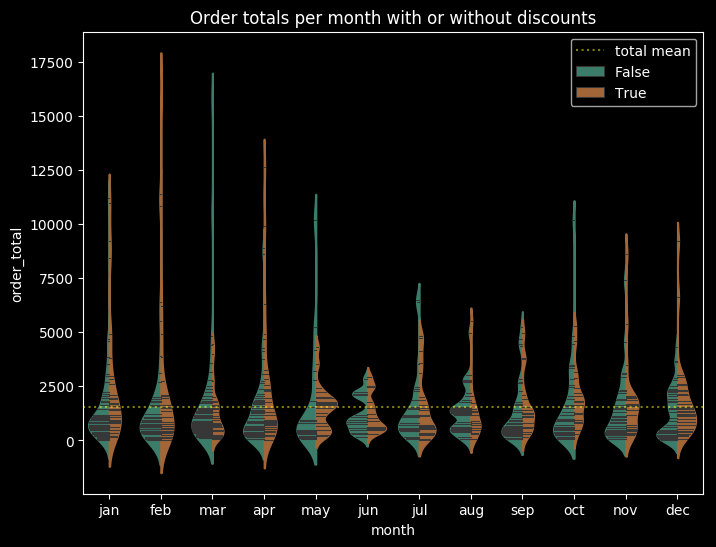

In [31]:
make_violinplot(x,y,title,hue, ticks)

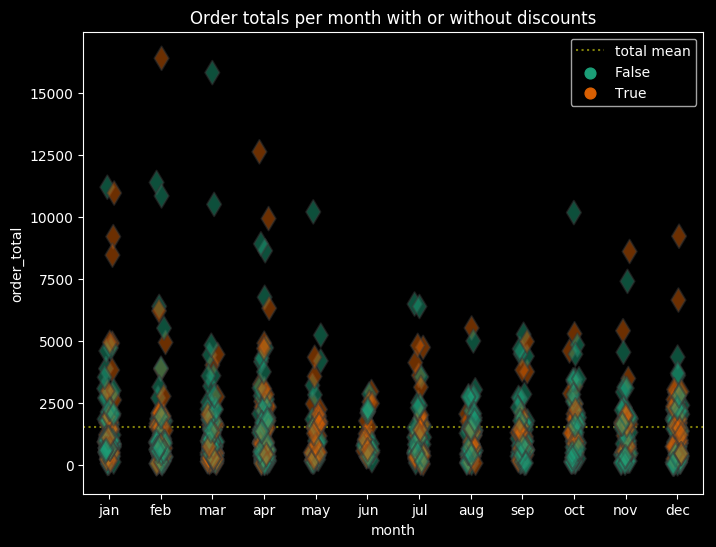

In [32]:
make_stripplot(x,y,title,hue,ticks)

## ***Aim 2 : Run final workflow for testing assumptions***

---



---




* ***Aim 2: Select the appropriate t-test based on tests for the assumptions of normality and homogeneity of variance.***
    1. **Test for Normality**<br>
        - [Normaltest/ D’Agostino and Pearson’s](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
<br>
        ```scipy.stats.normaltest```
        - Shapiro-Wilik Test<br>
        ```scipy.stats.shapiro```
    2. **Test for Homogeneity of Variance**<br>
        - [Levene's Test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html)<br>         ```scipy.stats.levene```
    3. **Choose appropriate test based upon 1. and 2.** 
        - [Mann Whitney U Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)<br>  - non parametric equivalent of ANOVA)<br>
    ```stats.mannwhitneyu```<br>
        - Normal: 2 sample t-test
        - Welch's t-test (Jeff)
        
    4.  Calculate effect size, post-hoc tukeys tests.
        - Effect size: [cohen's d](https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python)
          
* ***Aim 3: To perform post-hoc pairwise comparisons for level of discount***      
 
     
    6. If significant result, follow up with post-hoc tests
        - [Tukey's] https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
        ```statsmodels.stats.multicomp.pairwise_tukeyhsd```


### Aim 2.1: Test for Normality

#### Histograms month vs all months

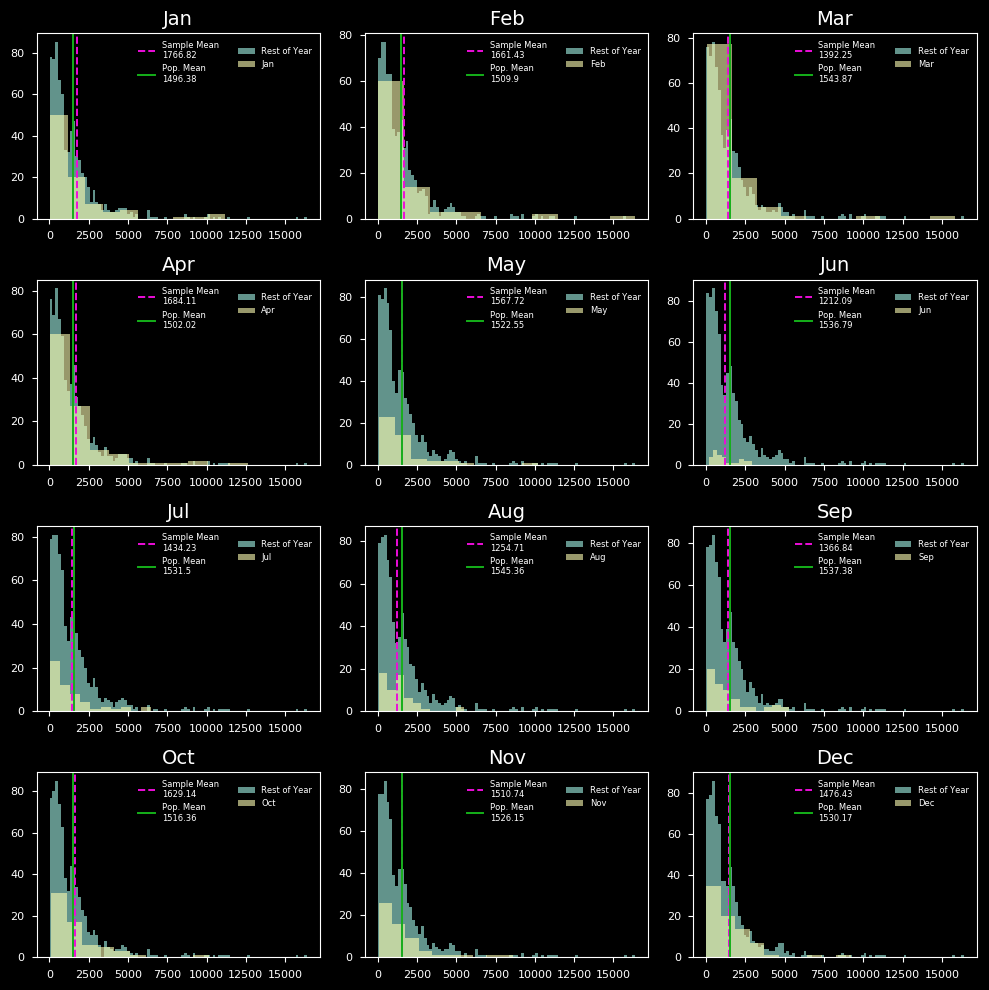

In [33]:
draw_histograms(df_year, 'month', month_dict, 4, 3)

In [0]:
# create a dict to test stats
dict_to_test ={}
for month in list(df_year['month_name'].unique()):
    dict_to_test[month] = df_year.groupby('month_name').get_group(month)

####Test for Normality

In [0]:
H3_tests = [['Group:','TestName','Test Purpose','stat','p', 'p < .05'] ]

In [36]:
from scipy.stats import normaltest

for month,  df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month][['order_total']]

    #1. Test for normality
    test_purpose = 'Normality'
    test_to_run = 'normaltest'

    arrA = np.array(arrA)
    

    statA, pA = eval(test_to_run)(arrA)
    
    print(f'{month}:', statA, pA)
    
    H3_tests.append([month, test_to_run, test_purpose ,statA, pA, pA < .05])
    
arrB = np.array(df_year['order_total'])
stat, p = eval(test_to_run)(arrB)
H3_tests.append(['Total Pop', test_to_run, test_purpose,stat,p, p < .05])

jul: [28.48205113] [6.53433177e-07]
aug: [35.41629845] [2.03914687e-08]
sep: [20.54630169] [3.45483472e-05]
oct: [55.13143348] [1.06748389e-12]
nov: [47.55832074] [4.70805868e-11]
dec: [65.10205167] [7.29909639e-15]
jan: [71.68838582] [2.71059611e-16]
feb: [91.35156962] [1.45632632e-20]
mar: [139.7219929] [4.56830131e-31]
apr: [81.80660343] [1.72155846e-18]
may: [51.83846589] [5.53885704e-12]
jun: [4.16950416] [0.12433794]


### Aim 2.2 Test Homogneity of variance

####Levenes Test

In [37]:
from scipy.stats import levene

for month,  df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month][['order_total']]
    arrB = df_year['order_total']

    test_to_run = 'levene'
    test_purpose = 'Equal Variance'

    arrA = np.array(arrA)
    arrB = np.array(arrB)

    stat, p = eval(test_to_run)(arrA,arrB,center='median')
    
    print(f'{month}:', stat,p)
    
    H3_tests.append([f'{month} & pop', test_to_run, test_purpose ,stat, p, p < .05])



# arrA = 

# stat,p = eval(test_to_run)(arrA,arrB,center='median')

# H3_tests.append(['A&B',test_to_run,'Equal Var',stat,p, p < .05])

jul: [0.08046409] [0.77673597]
aug: [2.12038023] [0.14570471]
sep: [0.37512766] [0.54037924]
oct: [0.04173708] [0.83816837]
nov: [0.00120583] [0.97230677]
dec: [0.14282319] [0.70557878]
jan: [0.67577551] [0.41125914]
feb: [1.01196253] [0.31470025]
mar: [0.39302627] [0.53086664]
apr: [1.21768439] [0.2701001]
may: [0.02152038] [0.88340401]
jun: [1.84896601] [0.17426091]


In [38]:
list2df(H3_tests)

,Group:,TestName,Test Purpose,stat,p,p < .05
0,jul,normaltest,Normality,[28.482051126185347],[6.534331770226038e-07],[True]
1,aug,normaltest,Normality,[35.4162984483613],[2.0391468707471406e-08],[True]
2,sep,normaltest,Normality,[20.54630169179557],[3.454834723154762e-05],[True]
3,oct,normaltest,Normality,[55.13143348111063],[1.067483890748691e-12],[True]
4,nov,normaltest,Normality,[47.558320737323626],[4.7080586849956407e-11],[True]
5,dec,normaltest,Normality,[65.10205167458949],[7.299096385000296e-15],[True]
6,jan,normaltest,Normality,[71.68838581919523],[2.710596112209101e-16],[True]
7,feb,normaltest,Normality,[91.35156962415954],[1.4563263232896427e-20],[True]
8,mar,normaltest,Normality,[139.72199290480154],[4.568301306359054e-31],[True]
9,apr,normaltest,Normality,[81.80660342704186],[1.721558457237129e-18],[True]


### Aim 2.3 T-Test
- Resample to compare results 
- Mann-Whitney U  because it is nonparametric

#### Resampling

In [0]:
months = {v:df_year.loc[df_year['month']==k]['order_total'] for k,
          v in month_dict.items()}

totals = df_year['order_total']

n = 30 #number of points per sample drawn each loop
i = 10000 #number of loops to draw sample populations

pop_samp_month_dict = {}#dict to store each months random sample means

pop_samp_order_total = []#container for populations random sample means

for k,v in months.items(): #create a list for each month in dict,
                            
    pop_samp_month_dict[k] = []
    
    for i in range(0,i): #do 10000 loops drawing 30 random samples
#append mean samples to above list for each month
            
        pop_samp_month_dict[k].append(round(v.sample(n=n).mean(),2))
                        
for i in range(0,i):#do the same for the whole pop as we just did for each month
    
    pop_samp_order_total.append(totals.sample(n=n).mean())
    
#Choose 1000 random mean samples to use to test hypothesis 

pop_samp_month_dict = {k:np.random.choice(pop_samp_month_dict[k],1000) for k,
                   v in pop_samp_month_dict.items()}

#same for population

pop_samp_order_total = np.random.choice(pop_samp_order_total, 1000)

##### Historgrams of resamples

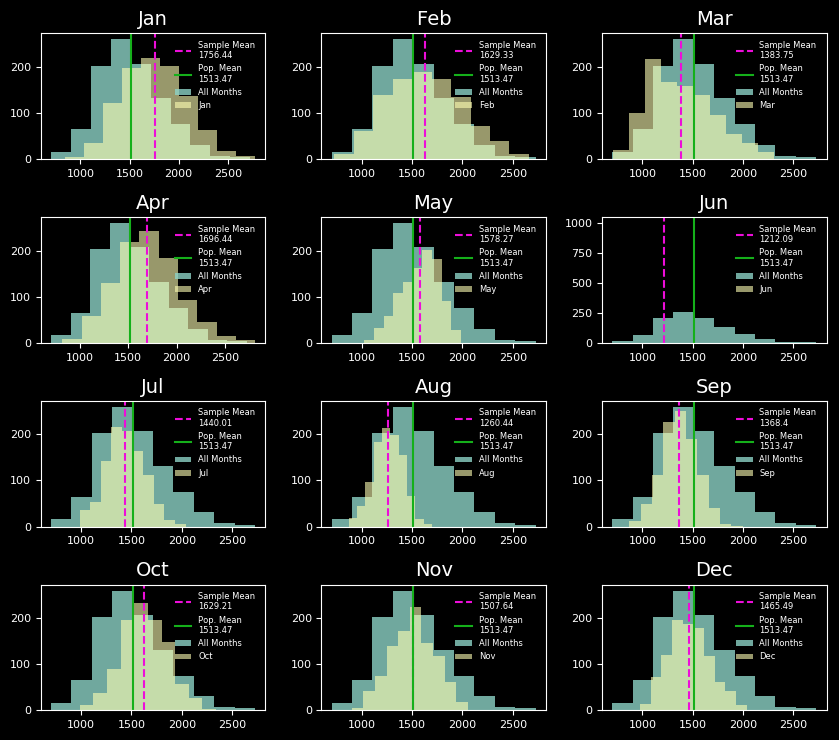

In [40]:
plt.style.context('dark_backm')
draw_histograms_from_sample(pop_samp_order_total, pop_samp_month_dict, 4,3)

##### Re-test homogeneity

In [41]:
from scipy.stats import levene

arrA = [pop_samp_month_dict[k] for k,v in pop_samp_month_dict.items()]
arrB = pop_samp_order_total

test_to_run = 'levene'
test_purpose = 'Equal Variance'

stat,p = eval(test_to_run)(arrA[0],arrA[1],arrA[2],arrA[3],arrA[4],arrA[5]
                           ,arrA[6],arrA[7],arrA[8],arrA[9],arrA[10],
                           arrA[11],arrB,center='mean')

H3_tests.append(['A&B Resampled',test_to_run,'Equal Var',stat,p])
print(stat, p)

313.73016104777247 0.0


#####T- Test resampled populations 

In [42]:
from scipy.stats import ttest_ind

for k, v  in pop_samp_month_dict.items(): 

    arrA = pop_samp_month_dict[k]
    arrB = pop_samp_order_total

    test_to_run = 'ttest_ind'
    test_purpose = 'H1 signifigance'


    stat,p = eval(test_to_run)(arrA,arrB,equal_var=False)

    print(f'{k}:',stat, p)

    H3_tests.append([f'{k} & pop', test_to_run, test_purpose ,stat, p, p < .05])


jan: 16.961886914346465 2.1564737086267136e-60
feb: 7.5421010135748165 7.025637727849394e-14
mar: -9.064395523617348 2.9089265481471925e-19
apr: 12.649463995016461 2.4550723629334655e-35
may: 5.516208597917038 4.0272241003524576e-08
jun: -29.759061236785318 7.521943820844159e-140
jul: -6.264299421697505 4.796241605087768e-10
aug: -22.81822302629906 4.6700031898838176e-98
sep: -12.613440692902106 8.90523034770545e-35
oct: 9.364887360826737 2.209469901670846e-20
nov: -0.47666265108922334 0.633661819650716
dec: -4.0098657209167055 6.341182809130774e-05


## Conclusions so far...
- We failed both normaltests and homo variance
the results for resampling do not seem reliable because they are being compared against them selfs
- Will try non-parametric 2sample ttest
    - [**Mann-Whitney U test**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
  - Most likey the tukeys test will be the best test for signifigance of these samples

####Mann-Whitney U test
- non parametric test 

In [43]:
from scipy.stats import mannwhitneyu

for month, df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month]['order_total']
    arrB = df_year.loc[df_year['month_name']!= month,'order_total']

    test_to_run = 'mannwhitneyu'
    test_purpose = 'Hi sig.'

    arrA = np.array(arrA).reshape(-1,1)
    arrB = np.array(arrB).reshape(-1,1)

    stat, p = eval(test_to_run)(arrA,arrB,alternative='two-sided')
    
    print(f'{month}:',stat, p)
    
    H3_tests.append([f'{month}', test_to_run, test_purpose ,stat, p, p < .05]) 


jul: 20657.0 0.7030246140364638
aug: 21976.5 0.8154472518206928
sep: 22266.5 0.641424120971533
oct: 26361.0 0.3157445706850974
nov: 22959.0 0.9040290966511673
dec: 30698.0 0.610309030236363
jan: 35222.0 0.2261872490717426
feb: 29060.0 0.34914363780901037
mar: 34919.0 0.2682612876761864
apr: 38065.5 0.999131226544708
may: 18534.0 0.75098597042676
jun: 12186.5 0.8852816264369389


###Aim 2.4 Test effect size
 - use cohens d

In [44]:
d_dict = {}
for month,  df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month][['order_total']]
    arrB = df_year[df_year['month_name']!= month]['order_total']

    test_to_run = 'Cohen_d'
    test_purpose = 'efect Size'

    arrA = np.array(arrA)
    arrB = np.array(arrB)

    d = Cohen_d(arrA, arrB)
    
    d_dict[month] = d
    
    print(f'{month}:',d)
    H3_tests.append([f'{month}', test_to_run, test_purpose ,stat])

jul: -0.052749530713908026
aug: -0.15774473701015873
sep: -0.09250458218541906
oct: 0.061168973116125624
nov: -0.008353033432259563
dec: -0.029140629162365816
jan: 0.1468047736499956
feb: 0.08219900692412836
mar: -0.08225129122081062
apr: 0.09879971312517516
may: 0.024493555997597418
jun: -0.17617034499076667


####View all test results 

In [45]:
#put results in DataFrame
list2df(H3_tests)

,Group:,TestName,Test Purpose,stat,p,p < .05
0,jul,normaltest,Normality,[28.482051126185347],[6.534331770226038e-07],[True]
1,aug,normaltest,Normality,[35.4162984483613],[2.0391468707471406e-08],[True]
2,sep,normaltest,Normality,[20.54630169179557],[3.454834723154762e-05],[True]
3,oct,normaltest,Normality,[55.13143348111063],[1.067483890748691e-12],[True]
4,nov,normaltest,Normality,[47.558320737323626],[4.7080586849956407e-11],[True]
5,dec,normaltest,Normality,[65.10205167458949],[7.299096385000296e-15],[True]
6,jan,normaltest,Normality,[71.68838581919523],[2.710596112209101e-16],[True]
7,feb,normaltest,Normality,[91.35156962415954],[1.4563263232896427e-20],[True]
8,mar,normaltest,Normality,[139.72199290480154],[4.568301306359054e-31],[True]
9,apr,normaltest,Normality,[81.80660342704186],[1.721558457237129e-18],[True]


#### Calculating Effect Size

In [46]:
# Calculating Cohens d
d = Cohen_d(arrA,arrB)
print(f"Cohen's d={round(d,3)}")

Cohen's d=-0.176


## ***Aim 3: Compare between all Months***

####Tukey's Test


In [0]:
# Importing tukey's test

from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukey

int_str = [str(x) for x in df_year['month_name']]# create labels

In [0]:
#run tukeys test
tukey_results =tukey(df_year['order_total'], int_str, 0.05)

In [49]:
# Save the results into a dataframe

dfH_tukey = pd.DataFrame(data=tukey_results._results_table.data[1:],
                         columns=tukey_results._results_table.data[0])

# checking for any signifigance
dfH_tukey.loc[dfH_tukey['reject']==True]
dfH_tukey

,group1,group2,meandiff,lower,upper,reject
0,apr,aug,-429.4049,-1421.7047,562.8950,False
1,apr,dec,-207.6797,-1111.0347,695.6754,False
2,apr,feb,-22.6780,-913.5247,868.1687,False
3,apr,jan,82.7094,-793.8885,959.3073,False
4,apr,jul,-249.8789,-1259.4613,759.7034,False
5,apr,jun,-472.0174,-1727.6696,783.6348,False
6,apr,mar,-291.8645,-1133.0197,549.2908,False
7,apr,may,-116.3951,-1188.8343,956.0440,False
8,apr,nov,-173.3675,-1160.2354,813.5004,False
9,apr,oct,-54.9710,-1016.8412,906.8993,False


## ***Conclusions for Hypothesis 3:***
1. **We first used D'Agostino & Perason's test (normaltest) to check for normal distributions**
    -  Both groups had p-values very far below our $\alpha=0.05$  (Rows 0,1 below)
        - We rejecteded the null hypothesis that the groups came from a populatiin with a normal distribtuion. 
2. **We tested for equal variances using Levene's test. **
    - Level's test had a signifcant p-value, so we rejected the hypothesis that the groups have equal variances
    
3. **We then concluded we need a non-parametric 2-sample test, so we used the Mann-Whitney U test**. 
    -  Our comparison had a p-value less than .05
    - We reject the null hypothesis that discounts do not affect quantities sold.



# Hypothesis 4 

$H_1$ the difference between discounted and non discounted quantities purchased is the ***same ***per country

$H_0$ : The difference between discouted and non discounted quantities purchased is ***different*** per country

**Specific Aims:**

* ***Aim 1:To select the proper dataset for analysis, perform EDA, and generate data groups for testing.***
    - Used sqlalchemy and pandas.read_sql_query()
    query = 

* ***Aim 2: Select the appropriate t-test based on tests for the assumptions of normality and homogeneity of variance.***
    1. **Test for Normality**
        - D'Agostino-Pearson's normality test<br>
        ```scipy.stats.normaltest```
        - Shapiro-Wilik Test<br>
        ```scipy.stats.shapiro```
    2. **Test for Homogeneity of Variance**
        - Levene's Test<br>
         ```scipy.stats.levene```

    3. **Choose appropriate test based upon 1. and 2.** 


* ***Aim 3: To perform post-hoc painrwise comparison testing to determine which level of discounts affect quantity and if any discount has a greater effect than the others.***
     - Tukey's test for multiple pairwise comparisons


## ***Aim 1.1 : To select the proper dataset for analyiss  and generate data groups for testing.***

#### Importing Method

In [50]:
DB_Order = pd.read_sql_table('Order',engine);
DB_OrderDetail = pd.read_sql_table('OrderDetail',engine);
print(f"DB_Order columns:{DB_Order.columns}",'n\n'
      "DB_OrderDetail columns:",'n\n'
     f"{DB_OrderDetail.columns}")

2019-04-08 13:59:28,894 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-08 13:59:28,898 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 13:59:28,901 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2019-04-08 13:59:28,905 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 13:59:28,910 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Order")
2019-04-08 13:59:28,914 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 13:59:28,919 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Order' AND type = 'table'
2019-04-08 13:59:28,923 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 13:59:28,927 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Order")
2019-04-08 13:59:28,929 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 13:59:28,931 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  

#####def df_drop_regex( )

In [0]:
def df_drop_regex(DF, regex_list):
    '''Use a list of regex to remove columns names. Returns new df.
    
    Parameters:
        DF -- input dataframe to remove columns from.
        regex_list -- list of string patterns or regexp to remove.
    
    Returns:
        df_cut -- input df without the dropped columns. 
        '''
    df_cut = DF.copy()
    
    for r in regex_list:
        
        df_cut = df_cut[df_cut.columns.drop(list(df_cut.filter(regex=r)))]
        print(f'Removed {r}\n')
        
    return df_cut

##### set up new df

In [52]:
# TAKE  DB_Orderm rename index, remove unwanted columns
DB_Order.rename({'Id':'OrderId','OrderDate':'OrderPlaced'},axis=1,inplace=True)

# Drop unwanted columns from DB_Orde to make df_Order
regex_to_drop = ['Date','Freight']

df_Order = df_drop_regex(DB_Order, regex_to_drop)
df_Order.rename({'OrderPlaced':'OrderDate'},axis=1,inplace=True)
df_Order.head()

Removed Date

Removed Freight



,OrderId,CustomerId,EmployeeId,OrderDate,ShipVia,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,3,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,1,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,1,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [0]:
# MERGING IMPORT DB_OrderDetail and cleaned df_Order
df_merged = DB_OrderDetail.merge(df_Order, on='OrderId',copy=True)

In [0]:
df_order_geo = df_merged.copy()
# df_order_geo.info()

In [0]:
#Apply calc_product_price to every row 
df_price_geo = df_order_geo.apply(lambda x: calc_product_price(x),
                                  axis=1)

# Apply_calc_order_total to every row
df_price_geo = df_price_geo.apply(lambda x: calc_order_total(x,df_price_geo),
                                  axis=1) 
# df_price_geo.info()

In [56]:
#Convert to Datetime
df_price_geo['OrderDate'] = pd.to_datetime(df_price_geo.OrderDate )
df_price_geo.OrderDate.agg(['mean','max','min'])

max   2014-05-06
min   2012-07-04
Name: OrderDate, dtype: datetime64[ns]

In [0]:
#create new columns for week_day and month
df_price_geo['OrderDate'] = pd.to_datetime(df_price_geo.OrderDate)

df_price_geo['week_day'] = df_price_geo['OrderDate'].dt.dayofweek
df_price_geo['month'] = df_price_geo['OrderDate'].dt.month

# df_price_geo.info()#Check for new columns and ensure pd.datetime

In [0]:
##make list of month names (strings) for labels

months = ['jan','feb',
          'mar','apr',
          'may' ,'jun',
          'jul', 'aug', 
          'sep', 'oct', 
          'nov', 'dec'
         ]
 #zip the two into a dictionary 
month_dict = dict(zip( list(range(1,len(months)+1)),months))

# MAP THE MONTH_DICT ONTO NEW COLUMN month_name
df_price_geo['month_name'] = df_price_geo['month'].map(month_dict)
# df_price_geo['month_name'].value_counts()#checking how many of each month

In [0]:
# df_price_geo.info()

In [60]:
#renamed df for ease of typing & it is a comprehensize starting point
df = df_price_geo
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,CustomerId,EmployeeId,OrderDate,ShipVia,...,ShipRegion,ShipPostalCode,ShipCountry,price,OnSale,discounted_order,order_total,week_day,month,month_name
0,10248/11,10248,11,14.0,12,0.0,VINET,5,2012-07-04,3,...,Western Europe,51100,France,168.0,False,False,440.0,2,7,jul
1,10248/42,10248,42,9.8,10,0.0,VINET,5,2012-07-04,3,...,Western Europe,51100,France,98.0,False,False,440.0,2,7,jul
2,10248/72,10248,72,34.8,5,0.0,VINET,5,2012-07-04,3,...,Western Europe,51100,France,174.0,False,False,440.0,2,7,jul
3,10249/14,10249,14,18.6,9,0.0,TOMSP,6,2012-07-05,1,...,Western Europe,44087,Germany,167.4,False,False,1863.4,3,7,jul
4,10249/51,10249,51,42.4,40,0.0,TOMSP,6,2012-07-05,1,...,Western Europe,44087,Germany,1696.0,False,False,1863.4,3,7,jul


####Engineering new features
- difference between quantity bought with and without discount

In [61]:
#Create New features for working exploring discount effects on sales
D_country = {}

countries = list(df['ShipCountry'].unique())

for country in countries:
    
#check for discounts    
    check_if_discounted = len(df.groupby('ShipCountry').get_group(
                                      country)['OnSale'].unique())
    
    if check_if_discounted < 2:
        print(f'{country} did not have both discounted and non-discounted items.')
        continue
        
    else:
        
#Organize prices based on sales and fullprice    
        D_country[country]={}

        D_country[country]['df_sale'] = df.loc[df['OnSale']==1].groupby(
                                        'ShipCountry').get_group(country)
        
        D_country[country]['df_fullprice'] = df.loc[df['OnSale']==0].groupby(
                                            'ShipCountry').get_group(country) 
#Get total sales
        D_country[country]['price']={}
        D_country[country]['price']['OnSale'] = D_country[country]['df_sale']['price']
        D_country[country]['price']['FullPrice'] = D_country[country]['df_fullprice']['price']
        
#Get Quantity sold at discount/nondiscount
        D_country[country]['quantity']={}
        D_country[country]['quantity']['OnSale'] = D_country[country]['df_sale']['Quantity']
        D_country[country]['quantity']['FullPrice'] = D_country[country]['df_fullprice']['Quantity']

Poland did not have both discounted and non-discounted items.
Norway did not have both discounted and non-discounted items.
Argentina did not have both discounted and non-discounted items.


In [62]:
dC = D_country

results = [['country','Price_Disc-Full','Price_Disc/Total','Quant_Disc-Full',
            'Quant_Disc/Total','AvgPrice_Disc','AvgPrice_Full','AvgPrice/item']]

for c in dC.keys():
    
    temp = ['country','Price_Disc-Full','Price_Disc/Total','Quant_Disc-Full',
            'Quant_Disc/Total','AvgPrice_Disc','AvgPrice_Full','AvgPrice/item']
    
    calc = dC[c]
    i=0
    temp[i] = c   # country name
    
    i+=1
    temp[i] = (calc['price']['OnSale'].sum()         # price sub
               - calc['price']['FullPrice'].sum())
    i+=1
    temp[i] = (calc['price']['OnSale'].sum()        # price/total 
               / (calc['price']['FullPrice'].sum() 
               + calc['price']['OnSale'].sum()))
    i+=1
    temp[i] = (calc['quantity']['OnSale'].sum()      # quantitty sub
               - calc['quantity']['FullPrice'].sum())
    i+=1
    temp[i] = (calc['quantity']['OnSale'].sum()      # quantity total
               / (calc['quantity']['FullPrice'].sum() 
               + calc['quantity']['OnSale'].sum()))
    i+=1
    temp[i] = (calc['price']['OnSale'].sum()       # average spent on sale 
               / calc['quantity']['OnSale'].sum() )
    i+=1                                           
    temp[i] = (calc['price']['FullPrice'].sum()      # average cost full price 
               / calc['quantity']['FullPrice'].sum()) 
    i+=1
    temp[i] = (calc['price']['FullPrice'].sum()  # average spent on all items
               + calc['price']['OnSale'].sum() 
               / calc['quantity']['FullPrice'].sum() 
               + calc['quantity']['OnSale'].sum())
    results.append(temp)

df_countries = list2df(results)
df_countries.set_index('country',inplace=True)
df_countries.sort_index()

,Price_Disc-Full,Price_Disc/Total,Quant_Disc-Full,Quant_Disc/Total,AvgPrice_Disc,AvgPrice_Full,AvgPrice/item
country,,,,,,,
Austria,3028.8385,0.511831,-159,0.484614,26.164672,23.465077,65016.102455
Belgium,-15311.1050,0.273671,-572,0.294540,22.577744,25.018310,24987.406553
Brazil,-19941.4835,0.406751,-451,0.446904,22.914724,27.004525,65350.145175
Canada,5379.4900,0.553585,162,0.540827,25.897381,24.597585,23511.902623
Denmark,-9929.9775,0.347984,-220,0.405983,23.927416,30.641007,21786.853270
Finland,-6910.0475,0.316320,-331,0.312994,21.480153,21.151398,13146.836188
France,-21576.2975,0.367400,-378,0.441918,20.786518,28.341030,52921.769809
Germany,-33551.8265,0.427151,-125,0.493216,21.647536,28.254065,136483.297981
Ireland,8062.6250,0.580659,566,0.668052,25.796680,37.493095,22135.556395


In [63]:
cleaned = pd.DataFrame(df.drop_duplicates(['OrderId']))

# Making average price of sales for each country
df_countries['AvgOrderPrice'] = (cleaned.groupby
                                 ('ShipCountry')['order_total'].mean())


#Column that shows percentage of total sales from each country
df_countries['PctOf-orders'] = round((cleaned.groupby
                                      ('ShipCountry')['OrderId'].count() 
                                     / cleaned['OrderId'].count().sum()
                                     *100),2)

#percentage of total income
df_countries['PctOf-Income'] = round((cleaned.groupby
                                      ('ShipCountry')['order_total'].sum()
                                    / cleaned['order_total'].sum()*100),2)

#Checking results, Three countries had no disc.
print(df_countries['PctOf-orders'].sum(),
      df_countries['PctOf-Income'].sum()) 


#comparing percentage of all orders vs percentage on overall income 
df_countries['orders2-Income'] = (df_countries['PctOf-orders'] 
                                / df_countries['PctOf-Income'])

#finding difference between full price and disc price
df_countries['DiscountGap'] = (df_countries['AvgPrice_Full']
                             - df_countries['AvgPrice_Disc'])

96.51 98.64


####EDA of new values

In [0]:
# Add stats to df
# Mean
# Std. Error Mean
# Std. deviation
    
df_header = df_countries.columns

country_col_means = pd.Series(df_countries.mean(axis=0)) 
country_col_sem = pd.Series(df_countries.sem(axis=0))   
country_col_std = pd.Series(df_countries.std(axis=0)) 

df_test = pd.DataFrame([country_col_means, country_col_sem,
                        country_col_std],columns=df_header)
df_test.index = ['mean','sem','std']
df_countries = pd.concat([df_countries, df_test])

In [65]:
# Create different criterila for exploring and anaqlyzing the current df
# Used crit3 for determining the samples used in hypothesis 4

crit = ((df_countries['orders2-Income'] < 1) 
        & (df_countries['AvgOrderPrice'] > 1488.357771))

crit2=((df_countries['AvgPrice_Full']> 25.907391) 
        & (df_countries['AvgPrice_Disc']> 22.236349))

crit3 = (df_countries['Quant_Disc/Total'] > 0.433410) 

winning = df_countries.loc[crit3]
losing = df_countries.loc[~crit3]
winning

,Price_Disc-Full,Price_Disc/Total,Quant_Disc-Full,Quant_Disc/Total,AvgPrice_Disc,AvgPrice_Full,AvgPrice/item,AvgOrderPrice,PctOf-orders,PctOf-Income,orders2-Income,DiscountGap
France,-21576.297500,0.367400,-378.000000,0.441918,20.786518,28.341030,52921.769809,1056.601591,9.280000,6.43,1.443235,7.554512
Germany,-33551.826500,0.427151,-125.000000,0.493216,21.647536,28.254065,136483.297981,1887.578963,14.700000,18.19,0.808136,6.606529
Brazil,-19941.483500,0.406751,-451.000000,0.446904,22.914724,27.004525,65350.145175,1288.262367,10.000000,8.45,1.183432,4.089801
Switzerland,-7951.421000,0.374554,-87.000000,0.465882,19.984207,29.107254,20433.471159,1760.703278,2.170000,2.50,0.868000,9.123047
Austria,3028.838500,0.511831,-159.000000,0.484614,26.164672,23.465077,65016.102455,3200.095962,4.820000,10.11,0.476756,-2.699595
USA,-47182.749500,0.403938,-802.000000,0.457020,23.264759,28.895318,150667.261708,2012.988611,14.700000,19.40,0.757732,5.630559
Sweden,-8972.360000,0.417677,-263.000000,0.441163,23.084574,25.407326,32737.973691,1472.841622,4.460000,4.31,1.034803,2.322752
Italy,1988.355000,0.563042,78.000000,0.547445,19.731678,18.523925,7364.768965,563.219821,3.370000,1.25,2.696000,-1.207753
Ireland,8062.625000,0.580659,566.000000,0.668052,25.796680,37.493095,22135.556395,2630.521316,2.290000,3.95,0.579747,11.696415
Portugal,-1202.637500,0.447585,75.000000,0.570356,16.890995,27.674672,6663.922980,882.489423,1.570000,0.91,1.725275,10.783677


In [66]:
losing

,Price_Disc-Full,Price_Disc/Total,Quant_Disc-Full,Quant_Disc/Total,AvgPrice_Disc,AvgPrice_Full,AvgPrice/item,AvgOrderPrice,PctOf-orders,PctOf-Income,orders2-Income,DiscountGap
Belgium,-15311.105000,0.273671,-572.000000,0.294540,22.577744,25.018310,24987.406553,1780.255526,2.290000,2.670000,0.857678,2.440566
Venezuela,-17156.671000,0.349001,-638.000000,0.391349,17.255856,20.695943,38143.745120,1235.013674,5.540000,4.490000,1.233853,3.440087
Mexico,-16575.522500,0.148557,-729.000000,0.144390,23.670794,22.894869,20230.794615,842.217054,3.370000,1.860000,1.811828,-0.775925
Finland,-6910.047500,0.316320,-331.000000,0.312994,21.480153,21.151398,13146.836188,855.002386,2.650000,1.490000,1.778523,-0.328755
Spain,-3433.380000,0.404539,-132.000000,0.408078,24.829044,25.195976,11018.407435,781.878261,2.770000,1.420000,1.950704,0.366932
UK,-26981.810000,0.271229,-1170.000000,0.286652,20.349555,21.971656,43770.737275,1053.059107,6.750000,4.660000,1.448498,1.622102
Denmark,-9929.977500,0.347984,-220.000000,0.405983,23.927416,30.641007,21786.853270,1814.501250,2.170000,2.580000,0.841085,6.713591
sem,3387.581611,0.026099,95.435165,0.028497,0.643744,1.037918,9675.744056,161.591187,0.978585,1.282850,0.135254,1.030677
std,14372.291574,0.110727,404.897114,0.120903,2.731174,4.403512,41050.705410,685.573344,4.151784,5.442672,0.573834,4.372794


In [67]:
print(winning.index)

Index(['France', 'Germany', 'Brazil', 'Switzerland', 'Austria', 'USA',
       'Sweden', 'Italy', 'Ireland', 'Portugal', 'Canada', 'mean'],
      dtype='object')


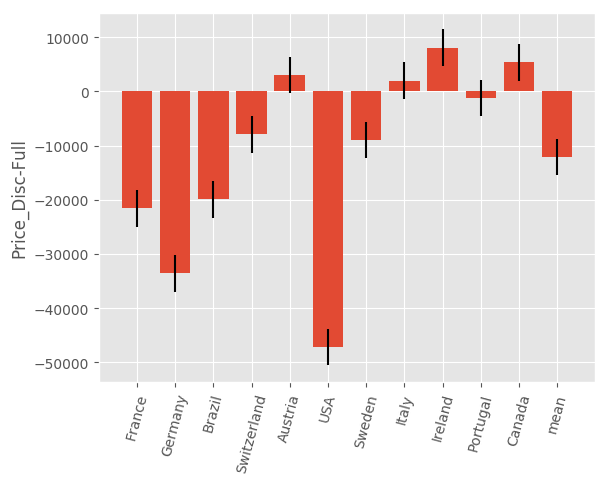

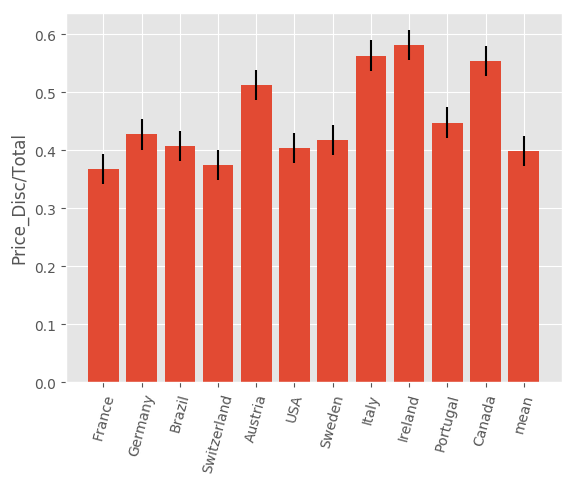

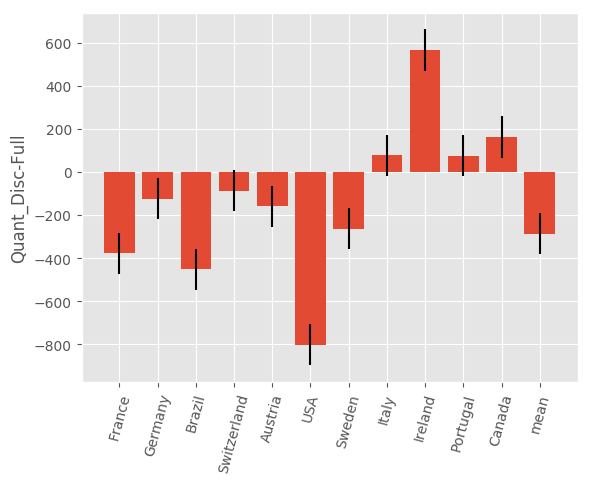

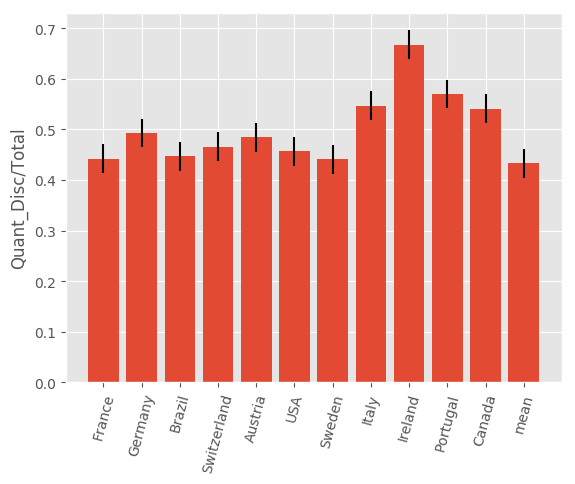

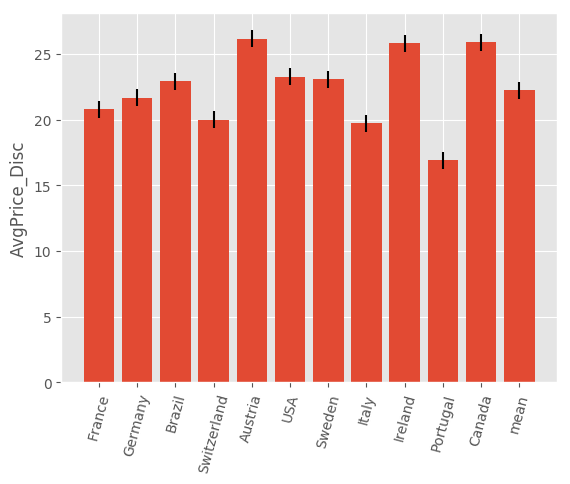

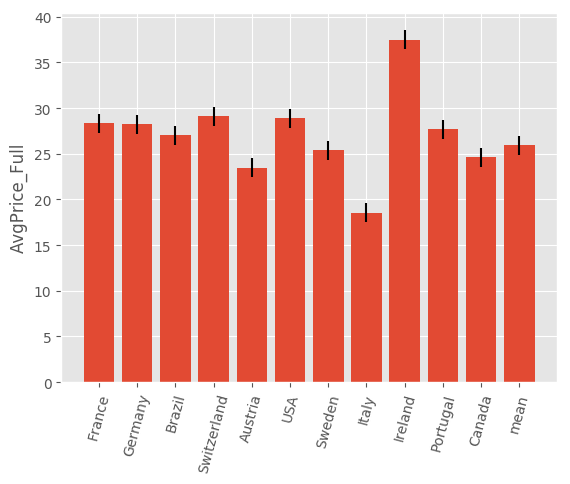

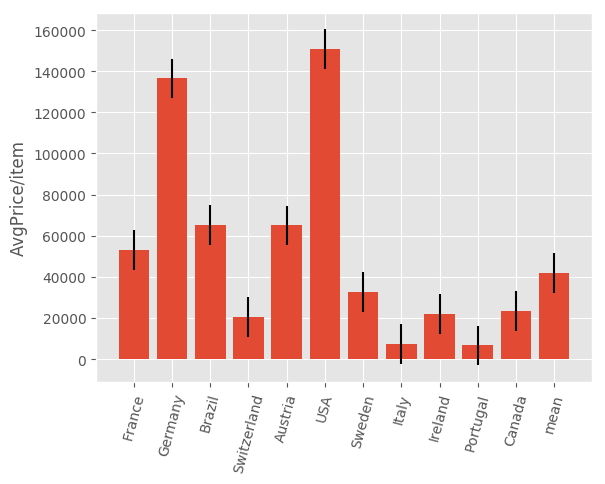

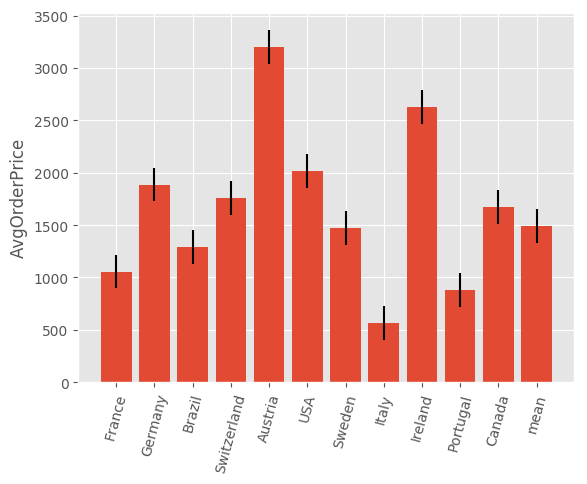

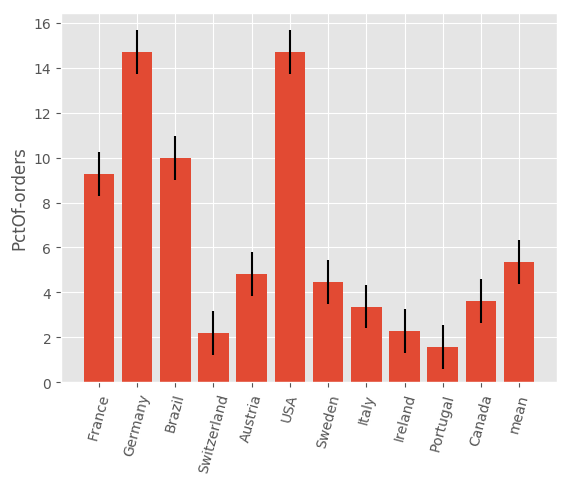

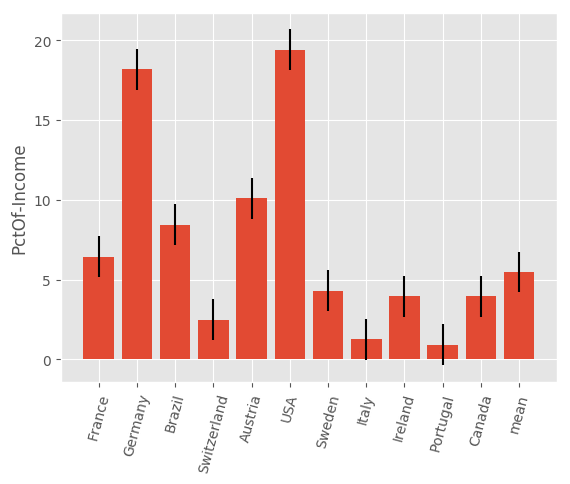

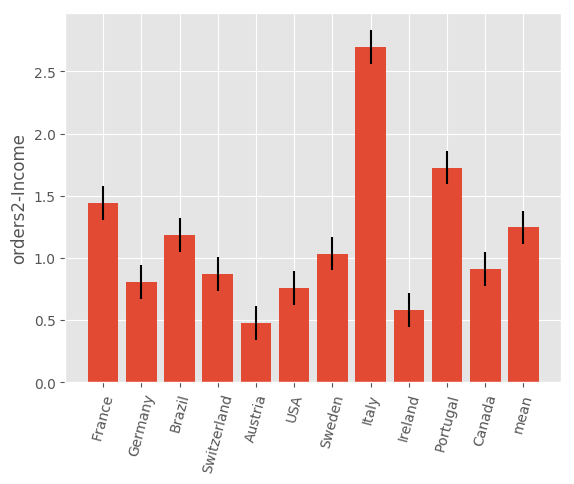

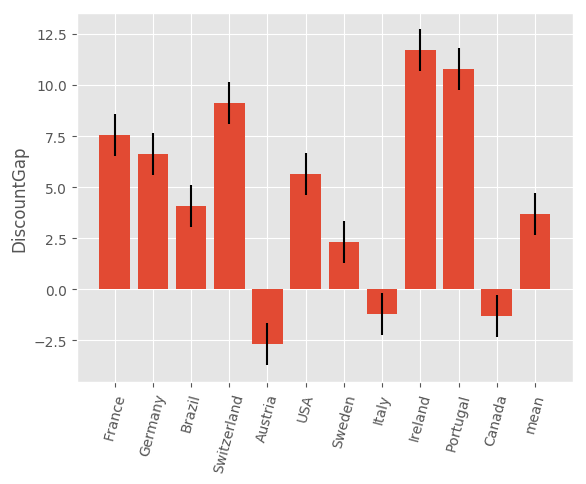

In [68]:
plt.style.use('ggplot')

for col in winning.columns:
    fig = plt.figure()

    plt.bar(x=winning.index,
            height=winning[col],
            yerr=df_test.loc['sem',col])
    
    ax = fig.gca()
    ax.set_xticklabels(winning.index, rotation=75)
    ax.set_ylabel(col)
    
    plt.tight_layout

In [69]:
make_stripplot(df_c)

NameError: ignored

In [0]:
plt.style.use('ggplot')
for col in df_countries.columns:
    fig = plt.figure()

    plt.bar(x=df_countries.index, height=df_countries[col],yerr=df_test.loc['sem',col])#,**bar_kws)
    ax = fig.gca()
    ax.set_xticklabels(df_countries.index, rotation=75)
    ax.set_ylabel(col)
    plt.tight_layout

In [0]:
# plt.style.use('ggplot')
# bar_kws = {'figsize':[6,4],
#           'title': 'Order Totals By Month',
#           'grid':False,
#           'legend':False,
#           'rot':45,
#            'yerr':'sem',
#           'ylim': [0,2500]}

# fig = df_country.plot(kind='bar',x=df_country['qu'].index.str.title(),y='mean',**bar_kws)#,table=True)
# fig.set(**{'xlabel':'Month','ylabel':'Order Total($)'})

## Hypothesis 4
- $H0$ - Orders shipped to countries with a higher than average price for discounted items Have  no different average order total compared to all other countries


$H1$ - Orders shipped to countries with higher than average discounted sales prices per item do have higher order totals.

  - I am defining countries with higher than average discount prices as the following:
   Brazil, Belgium, Austria', Mexico, USA, Sweden, Spain, Ireland, Canada, Denmark.
  
  

In [0]:
df_c = df.drop_duplicates('OrderId')
df_c.set_index('OrderId',inplace=True)
df_c.head()

In [0]:
countries = list(df['ShipCountry'].unique())

In [0]:

country_one = {
    'France':1,
    'Germany':1,
    'Brazil':1,
    'Belgium':0,
    'Switzerland':1,
    'Venezuela':0,
    'Austria':1,
    'Mexico':0,
    'USA':1,
    'Sweden':1,
    'Finland':0,
    'Italy':1,
    'Spain':1,
    'UK':0,
    'Ireland':1,
    'Portugal':1,
    'Canada':1,
    'Denmark':0,
    'Poland':0,
    'Norway':0,
    'Argentina':0
}

# MAP THE MONTH_DICT ONTO NEW COLUMN country name
df_c.loc[:,['Abovecrit']] = df_c['ShipCountry'].map(country_one)


In [0]:
h4_samp = df_c.groupby('Abovecrit')['order_total'].get_group(1)
h4_pop = df_c.groupby('Abovecrit')['order_total'].get_group(0)

print(h4_pop.mean(),h4_samp.mean())

h4_pop= pd.DataFrame(h4_pop)
h4_samp= pd.DataFrame(h4_samp)
h4_samp.head()

### Going back to the original df to test the hypthesis.


In [0]:
plot_wide_kde_thin_bar(h4_samp.order_total,
                       '40%+ dic/total',
                       h4_pop.order_total,
                       'Populatioin')
plt.tight_layout()

In [0]:
with plt.style.context(('dark_background')):
    
    sns.set_palette('Dark2')
    fig = plt.figure()
    plt.title('Distribution of total order price for orders'
              'with an average or 40% discounted Items ')

    disc = h4_samp['order_total']
    full = h4_pop['order_total']
    label = 'less than 40$ discounted on average'
    
    plt.hist(full, alpha = 0.8, bins=30,label=label)
    plt.hist(disc, alpha = 0.5, bins=30,label='Discounted')

    # Adding annotations
    meanD = round(np.mean(disc),3)
    meanF = round(np.mean(full),3)
    
    plt.axvline(meanD, color='green',linestyle='--',label='Discounted Mean')
    plt.text(meanD,190,f'Mean:{meanD}',rotation=270,fontweight='medium')
    
    plt.axvline(meanF,color='white',linestyle='-',label='Full Price Mean')
    plt.text(meanF, 190, f'Mean:{meanF}',rotation=270,fontweight='medium')

    plt.xlabel('order_total')
    plt.ylabel('Counts')
    plt.legend()
    plt.show()

In [0]:
# x = df_c.loc[df_c['Abovecrit'], 'ShipCountry']
# x
# make_stripplot(df_c['Abovecrit']['ShipCountry'],df_c["order_total"]
#                ,title='Countries with avg 40% discount items/order', 
#                hue= df_countries['orders2-Income'] > 1,
#                ticklabels = df_c['Abovecrit'])
# make_stripplot(x, y, title=None, hue=None, ticklabels=None):

#     plt.style.use('dark_background')
#     fig,ax =plt.subplots(figsize=(8,6))


#     sns.stripplot(x, y, jitter=True, size=12,edgecolor='gray',linewidth=1.5, alpha=.5, palette='Dark2',marker='d', hue=hue).set_title(title)

#     ax.axhline(y.mean(),label='total mean', ls=':', alpha=.5, color='xkcd:yellow')
#     ax.set_xticklabels(ticklabels)

#     plt.legend()
#     plt.show()



##Check for normality

In [0]:
H4_tests = [[
    'Group:',
    'TestName',
    'Test Purpose',
    'stat','p',
    'p < .05'
]]

####Normal test

In [0]:
from scipy.stats import normaltest
# Test for normality

test_purpose = 'Normality'
test_to_run = 'normaltest'

arrA = h4_samp.order_total
arrB = h4_pop.order_total
arrA = np.array(arrA)
arrB = np.array(arrB)

statA, pA = eval(test_to_run)(arrA)
stat, p = eval(test_to_run)(arrB)

print('samp:', statA, pA,
      '\n''pop:',stat,p)

H4_tests.append(['Sample', test_to_run, 
                 test_purpose , statA,
                 pA, pA < .05])

H4_tests.append(['Total Pop', test_to_run, 
                 test_purpose, stat, p,
                 p < .05])

### Check variance 
- levenes test

In [0]:
from scipy.stats import levene

# Levenes test for testing homogeneity of variance
# Choose this over Bartlett's due to  dev. from normality
# Set to center='median' (default) because of skewed dist,
# Use 'mean' for symetrical distribution
# Use trimmed for heavy tailed distributions

arrA = h4_samp.order_total
arrB =h4_pop.order_total

test_to_run = 'levene'
test_purpose = 'Equal Variance'

arrA = np.array(arrA)
arrB = np.array(arrB)

stat, p = eval(test_to_run)(arrA,arrB,
                            center='median')
print('sample and pop:', stat,p)

H4_tests.append(['sample & pop', test_to_run,
                 test_purpose ,stat, p, p < .05])

## T-test
- Both sample and population are not normal and dont have equal variance.
- use Whitney-Mann U

In [0]:
from scipy.stats import mannwhitneyu

# Mann Whitney U test for non normal distributioin
#Set alternative to 'greater' for one tail test

arrA = h4_samp.order_total
arrB =h4_pop.order_total

test_to_run = 'mannwhitneyu'
test_purpose = 'Hi sig.'

arrA = np.array(arrA)
arrB = np.array(arrB)

stat, p = eval(test_to_run)(arrA,arrB,
                            alternative='greater')
print('sample and pop:', stat, p)

H4_tests.append(['sample and pop', test_to_run,
                 test_purpose ,stat, p, p < .05]) 

In [0]:
from scipy.stats import ttest_ind

# Run a Welch's one sided t_test for unequal homogeneity
# equal_var is set false, test compensates for this
# Divide in half because it is a one sided test

arrA = h4_samp.order_total
arrB =h4_pop.order_total

test_to_run = "ttest_ind"
test_purpose = 'signifigance'

arrA = np.array(arrA)
arrB = np.array(arrB)

stat, p = eval(test_to_run)(arrA,arrB,
                            equal_var=False)
p = p /2 
print('sample and pop:', stat, p)

H4_tests.append(['sample and pop', test_to_run,
                 test_purpose ,stat, p, p < .05])                   

In [0]:
# Coding all countries for comparison in a Tukeys test
# Anything With a 1 as a prefix met Criteria in crit3

new_country= {
    'France':11,
    'Germany':12,
    'Brazil':13, 
    'Belgium':1, 
    'Switzerland':14,
    'Venezuela':2,
    'Austria':15,
    'Mexico':3,
    'USA':16,
    'Sweden':17,
    'Finland':4,
    'Italy':18,
    'Spain':19,
    'UK':5,
    'Ireland':110,
    'Portugal':111,
    'Canada':112,
    'Denmark':6,
    'Poland':7,
    'Norway':8,
    'Argentina':9
    }

df_c.loc[:,'CountryCode'] = df_c['ShipCountry'].map(new_country)


In [0]:
# Codes for countries the meet criteria(crit3)
# The rest of the population is a 0

countries = {
    'France':1,
    'Germany':2, 
    'Brazil':3,
    'Belgium':0,
    'Switzerland':4,
    'Venezuela:0,
    'Austria':5,
    'Mexico':0,
    'USA':6,
    'Sweden':7,
    'Finland':0,
    'Italy':8,
    'Spain':9,
    'UK':0,
    'Ireland':10,
    'Portugal':11,
    'Canada':12,
    'Denmark':0,
    'Poland':0,
    'Norway':0,
    'Argentina':0
    }

df_c['AbovecritGroups'] = df_c['ShipCountry'].map(countries)


In [0]:
# Tukeys ran with subset of countries about 43% ran against the whole poplulation
# Create labels
# Run Test
# Put results in df
# Checking for any signifigance
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukey


int_str = [str(x) for x in df_c['AbovecritGroups']]

tukey_results =tukey(df_c['order_total'],
                     int_str, 0.05)
dfH_tukey = pd.DataFrame(data=tukey_results._results_table.data[1:],
                         columns=tukey_results._results_table.data[0])
dfH_tukey.loc[dfH_tukey['reject']==True]

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukey

int_str = [str(x) for x in df_c['CountryCode']]

tukey_results = tukey(df_c['order_total'],
                      int_str, 0.05)
dfH_tukey = pd.DataFrame(data=tukey_results._results_table.data[1:],
                         columns=tukey_results._results_table.data[0])
dfH_tukey.loc[dfH_tukey['reject']==True]

In [0]:
list2df(H4_tests)